# Introduction to scikit-learn
This tutorial will go over scikit-learn estimator interface basic and then will show how scikit-learn can be applied to building predictions on Titanic dataset.  

## Scikit-learn estimator object basics

Every algorithm is exposed in scikit-learn via an ''Estimator'' object.All the parameters of an estimator can be set when it is instantiated.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# linear regression Estimator
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
print "model.normalize param is:", model.normalize 
print model

model.normalize param is: True
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore

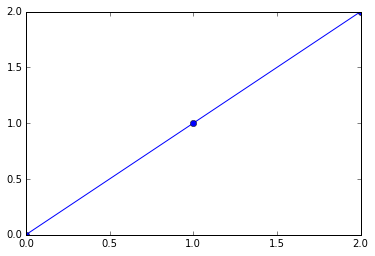

In [2]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
plt.plot(x, y, marker='o')

In [3]:
print "x:", x
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
print "Input vector X: \n", X

x: [0 1 2]
Input vector X: 
[[0]
 [1]
 [2]]


In [4]:
model.fit(X, y) 
print "model.coef_:",  model.coef_

model.coef_: [ 1.]


predicted: [ 5. 10. -10.]


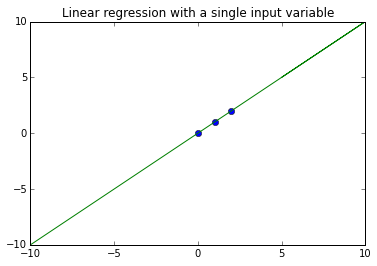

In [5]:
# Plot the data and the model prediction
X_test = [[5], [10], [-10]]
y_test = model.predict(X_test)
print "predicted:", y_test
plt.plot(X[:, 0], y, 'o')
plt.plot(X_test, y_test)
plt.title('Linear regression with a single input variable');

## A recap on Scikit-learn's estimator interface
Scikit-learn strives to have a uniform interface across all methods, and we’ll see examples of these below. Given a scikit-learn estimator object named model, the following methods are available:

* Available in **all Estimators**
  * **model.fit** : fit training data.  
  For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. **model.fit(X, y)**).  
  For unsupervised learning applications, this accepts only a single argument, the data X (e.g. **model.fit(X)**).
* Available in **supervised estimators**
  * **model.predict(X_new)** : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new, and returns the learned label for each object in the array.   
  * **model.predict_proba()** : For classification problems, *some* estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
  * **model.score()** : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.
* Available in **unsupervised estimators**
  * **model.transform(X_new)** : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
  * **model.fit_transform()** : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Pandas (Python Data Analysis Library)
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.  
Few highlights:
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases;
* Integrated handling of missing data
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Highly optimized for performance...  
  
Let us have a look at the Titanic dataset from the Kaggle Getting Started challenge at:  
https://www.kaggle.com/c/titanic-gettingStarted  
We can load the CSV file as a pandas data frame in one line (compare with manual file IO handling below). The cv file is located in the same folder as the notebook. The meaning of the columns is explained on the challenge website: https://www.kaggle.com/c/titanic-gettingStarted/data.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

with open('titanic_train.csv', 'r') as f:
    for i, line in zip(range(5), f):
        print(line.strip())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


pandas data frames have a HTML table representation in the IPython notebook. Let's have a look at the first 5 rows:

In [7]:
#data = pd.read_csv('https://dl.dropboxusercontent.com/u/5743203/data/titanic/titanic_train.csv')
data = pd.read_csv('titanic_train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
print data.count()
print data.shape

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
(891, 12)


The data frame has 891 rows.However this cannot be directly fed to a *scikit-learn model*:
* the target variable (survival) is mixed with the input data
* some attribute such as unique ids have no predictive values for the task
* the values are heterogeneous (string labels for categories, integers and floating point numbers)
* some attribute values are missing (nan: "not a number")
* Some passengers have missing information though: in particular Age and Cabin info can be missing. 

### Predicting survival on numerical features
The goal of the challenge is to predict whether a passenger has survived from others known attribute.
Let us have a look at the Survived columns:




In [9]:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [10]:
survived_column = data['Survived']
target = survived_column.values
np.mean(survived_column == 0)

0.61616161616161613

From this the subset of the full passengers list, about 2/3 perished in the event. So if we are to build a predictive model from this data, a baseline model to compare the performance to would be to always predict death. Such a constant model would reach around 62% predictive accuracy (which is higher than predicting at random).  
  
  
sklearn estimators all work with homegeneous numerical feature descriptors passed as a numpy array. Therefore passing the raw data frame will not work out of the box.  
Let us start simple and build a first model that only uses readily available numerical features as input, namely data['Fare'], data['Pclass'] and data['Age'].

In [11]:
numerical_features = data[['Fare', 'Pclass', 'Age']]
print numerical_features.head(5)

      Fare  Pclass  Age
0   7.2500       3   22
1  71.2833       1   38
2   7.9250       3   26
3  53.1000       1   35
4   8.0500       3   35


Let's use **pandas fillna** method to input the median age for the passengers that do not have Age info. Once data frame is clean, we can convert it into an homogeneous numpy array of floating point values and use in to build model.

In [13]:
# see mean for all numerical features
median_features = numerical_features.dropna().median()
print "median_features: \n", median_features
imputed_features = numerical_features.fillna(median_features)
print "\nimputed_features count: \n", imputed_features.count()

median_features: 
Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

imputed_features count: 
Fare      891
Pclass    891
Age       891
dtype: int64


Let's take the 80% of the data for training a first model and keep 20% for computing is generalization score.

In [14]:
# convert it into an homogeneous numpy array of floating point values
features_array = imputed_features.values
print "features_array:", features_array

# split train data
from sklearn.cross_validation import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)


features_array: [[  7.25     3.      22.    ]
 [ 71.2833   1.      38.    ]
 [  7.925    3.      26.    ]
 ..., 
 [ 23.45     3.      28.    ]
 [ 30.       1.      26.    ]
 [  7.75     3.      32.    ]]


In [15]:
features_train.shape

(712, 3)

In [16]:
features_test.shape

(179, 3)

In [17]:
target_train.shape

(712,)

Let's start with a simple model from sklearn, namely **LogisticRegression**:

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [19]:
target_predicted = logreg.predict(features_test)

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.73184357541899436

This first model has around 73% accuracy: this is better than our baseline that always predicts death.  
Alternatively we can evaluate model with **fit** method:

In [20]:
logreg.score(features_test, target_test)

0.73184357541899436

###Model evaluation and interpretation
The **coef_** attribute of a fitted linear model such as LogisticRegression holds the weights of each features:

Index([u'Fare', u'Pclass', u'Age'], dtype='object')
[[ 0.0043996  -0.80916725 -0.03348064]]


([<matplotlib.axis.XTick at 0x7fb55629b3d0>,
 <a list of 3 Text xticklabel objects>)

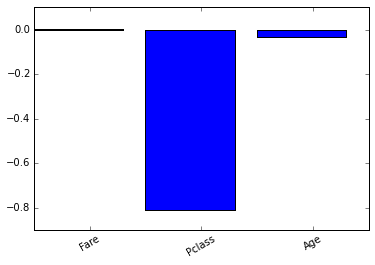

In [21]:
feature_names = numerical_features.columns
print feature_names
print logreg.coef_

# plot bar chart
x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
plt.xticks(x + 0.5, feature_names, rotation=30)

In this case, survival is slightly positively linked with Fare (the higher the fare, the higher the likelihood the model will predict survival) while passenger from first class and lower ages are predicted to survive more often than older people from the 3rd class.

First-class cabins were closer to the lifeboats and children and women reportedly had the priority  
  
It is possible to see the details of the false positive and false negative errors by computing the **confusion matrix**:

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[98 12]
 [36 33]]


The true labeling are seen as the rows and the predicted labels are the columns:

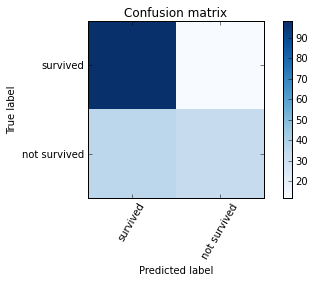

In [23]:
def plot_confusion(cm, target_names = ['survived', 'not survived'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)


We can normalize the number of prediction by dividing by the total number of true "survived" and "not survived" to compute true and false positive rates for survival in the first row and the false negative and true negative rates in the second row.

In [24]:
cm.sum(axis=1)

array([110,  69])

In [25]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.89090909  0.10909091]
 [ 0.52173913  0.47826087]]


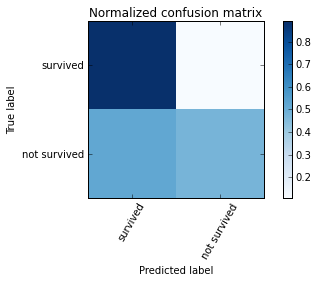

In [26]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

We can therefore observe that the fact that the target classes are not balanced in the dataset makes the accuracy score not very informative.

scikit-learn provides alternative classification metrics to evaluate models performance on imbalanced data such as **precision, recall and f1 score**:

In [27]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['not survived', 'survived']))

              precision    recall  f1-score   support

not survived       0.73      0.89      0.80       110
    survived       0.73      0.48      0.58        69

 avg / total       0.73      0.73      0.72       179



Instead of using a single train / test split, we can use a group of them and compute the min, max and mean scores as an estimation of the real test score while not underestimating the variability:

In [28]:

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=5)
print "scores:", scores

scores: [ 0.63128492  0.68715084  0.70224719  0.73033708  0.71751412]


In [29]:
scores.min(), scores.mean(), scores.max()

(0.63128491620111726, 0.69370682962933028, 0.7303370786516854)

**cross_val_score**  accuracy by default be it can also be used to report other performance metrics such as ROC-AUC or f1-score: reports accuracy by default be it can also be used to report other performance metrics such as ROC-AUC or f1-score:

In [30]:
scores = cross_val_score(logreg, features_array, target, cv=5,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.61093544137022393, 0.72123181651091728, 0.78776737967914434)

### More feature engineering 
Let us now try to build richer models by including more features as potential predictors for our model.

Categorical variables such as data['Embarked'] or data['Sex'] can be converted as boolean indicators features also known as dummy variables or one-hot-encoded features:

In [31]:
pd.get_dummies(data['Sex'], prefix='Sex').head(5)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
pd.get_dummies(data.Embarked, prefix='Embarked').head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


We can combine those new numerical features with the previous features using pandas.concat along axis=1:

In [33]:
rich_features = pd.concat([data[['Fare', 'Pclass', 'Age']],
                           pd.get_dummies(data['Sex'], prefix='Sex'),
                           pd.get_dummies(data['Embarked'], prefix='Embarked')],
                          axis=1)
rich_features.head(5)

,Fare,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22,0,1,0,0,1
1,71.2833,1,38,1,0,1,0,0
2,7.9250,3,26,1,0,0,0,1
3,53.1000,1,35,1,0,0,0,1
4,8.0500,3,35,0,1,0,0,1


The new Sex_male feature is redundant with Sex_female. Let us drop it.

In [34]:
rich_features_no_male = rich_features.drop('Sex_male', 1)
rich_features_no_male.head(5)

,Fare,Pclass,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22,0,0,0,1
1,71.2833,1,38,1,1,0,0
2,7.9250,3,26,1,0,0,1
3,53.1000,1,35,1,0,0,1
4,8.0500,3,35,0,0,0,1


In [35]:
# Also let us not forget to imput the median age for passengers without age information:
rich_features_final = rich_features_no_male.fillna(rich_features_no_male.dropna().median())
rich_features_final.head(5)

,Fare,Pclass,Age,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,3,22,0,0,0,1
1,71.2833,1,38,1,1,0,0
2,7.9250,3,26,1,0,0,1
3,53.1000,1,35,1,0,0,1
4,8.0500,3,35,0,0,0,1


We can finally cross-validate a logistic regression model on this new data an observe that the mean score has significantly increased:

In [36]:
# %%time

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1)
scores = cross_val_score(logreg, rich_features_final, target, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("  min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Logistic Regression CV scores:
  min: 0.770, mean: 0.786, max: 0.810


## Training Non-linear models: ensembles of randomized trees
sklearn also implement non linear models that are known to perform very well for data-science projects where datasets have not too many features (e.g. less than 5000).

In particular let us have a look at **Random Forests** and **Gradient Boosted Trees**.
Both models seem to do slightly better than the logistic regression model on this data.

In [37]:
 %%time
# for non-Windows you can set n_jobs >1, 
# for Win there is bug http://stackoverflow.com/questions/16405687/python-2-7-on-windows-assert-main-name-not-in-sys-modules-main-name-for-all

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, rich_features_final, target, cv=5, n_jobs=1,
                         scoring='accuracy')
print("Random Forest CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Random Forest CV scores:
min: 0.782, mean: 0.808, max: 0.843
CPU times: user 707 ms, sys: 26.9 ms, total: 734 ms
Wall time: 904 ms


In [42]:
 %%time
# for non-Windows you can set n_jobs >1, with 1 job it takes ~21sec


from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                subsample=.8, max_features=.5)
scores = cross_val_score(gb, rich_features_final, target, cv=5, n_jobs=4,
                         scoring='accuracy')
print("Gradient Boosted Trees CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Gradient Boosted Trees CV scores:
min: 0.799, mean: 0.833, max: 0.854
CPU times: user 73.4 ms, sys: 32.6 ms, total: 106 ms
Wall time: 779 ms


### Automated parameter tuning
Instead of changing the value of the learning rate manually and re-running the cross-validation, we can find the best values for the parameters automatically (assuming we are ready to wait):

In [44]:
%%time

from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(rich_features_final, target)

CPU times: user 651 ms, sys: 48.8 ms, total: 699 ms
Wall time: 7.52 s


In [45]:
# Let us sort the models by mean validation score:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.87385, std: 0.02614, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: 0.87323, std: 0.02493, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 5},
 mean: 0.87217, std: 0.02816, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.87115, std: 0.02598, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 5},
 mean: 0.87083, std: 0.02832, params: {'max_features': 1, 'learning_rate': 0.05, 'max_depth': 5},
 mean: 0.86844, std: 0.02557, params: {'max_features': 1, 'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.86841, std: 0.02512, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.86795, std: 0.02617, params: {'max_features': 1, 'learning_rate': 0.1, 'max_depth': 4},
 mean: 0.86780, std: 0.02596, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: 0.86752, std: 0.02465, params: {'max_features': 1, 'learning_rate': 0.1, 'max_depth': 5},
 mean: 0.8634

In [46]:
gs.best_score_

0.87384511833030432

In [47]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5}

We should note that the mean scores are very close to one another and almost always within one standard deviation of one another. This means that all those parameters are quite reasonable. The only parameter of importance seems to be the learning_rate: 0.5 seems to be a bit too high.

### Avoiding data snooping with pipelines

When doing imputation in pandas, prior to computing the train test split we use data from the test to improve the accuracy of the median value that we impute on the training set. This is actually cheating. To avoid this we should compute the median of the features on the training fold and use that median value to do the imputation both on the training and validation fold for a given CV split.

To do this we can prepare the features as previously but without the imputation: we just replace missing values by the -1 marker value:

In [48]:
features = pd.concat([data[['Fare', 'Age']],
                      pd.get_dummies(data['Sex'], prefix='Sex'),
                      pd.get_dummies(data['Pclass'], prefix='Pclass'),
                      pd.get_dummies(data['Embarked'], prefix='Embarked')],
                     axis=1)
features = features.drop('Sex_male', 1)
features = features.fillna(-1)
features.head(5)

,Fare,Age,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,22,0,0,0,1,0,0,1
1,71.2833,38,1,1,0,0,1,0,0
2,7.9250,26,1,0,0,1,0,0,1
3,53.1000,35,1,1,0,0,0,0,1
4,8.0500,35,0,0,0,1,0,0,1


We can now use the Imputer transformer of scikit-learn to find the median value on the training set and apply it on missing values of both the training set and the test set.

In [51]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features.values, target, random_state=0)

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median', missing_values=-1)
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values=-1, strategy='median', verbose=0)

In [52]:
imputer.statistics_

array([ 14.5,  29. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ])

Imputation can now happen by calling the transform method:

In [53]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)
print "Original train set has  -1 values:", np.any(X_train == -1)
print "X_train_imputed has -1 values:", np.any(X_train_imputed == -1)
print "Original test set has  -1 values:", np.any(X_test == -1)
print "X_test_imputed has -1 values:", np.any(X_test_imputed == -1)

Original train set has  -1 values: True
X_train_imputed has -1 values: False
Original test set has  -1 values: True
X_test_imputed has -1 values: False


We can now use a pipeline that wraps an imputer transformer and the classifier itself:

In [54]:
from sklearn.pipeline import Pipeline

imputer = Imputer(strategy='median', missing_values=-1)

classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                        subsample=.8, max_features=.5,
                                        random_state=0)

pipeline = Pipeline([
    ('imp', imputer),
    ('clf', classifier),
])

scores = cross_val_score(pipeline, features.values, target, cv=5, n_jobs=1,
                         scoring='accuracy', )
print(scores.min(), scores.mean(), scores.max())

(0.7988826815642458, 0.82385722751399304, 0.848314606741573)


The mean cross-validation is slightly lower than we used the imputation on the whole data as we did earlier although not by much. This means that in this case the data-snooping was not really helping the model cheat by much.

Let us re-run the grid search, this time on the pipeline. Note that thanks to the pipeline structure we can optimize the interaction of the imputation method with the parameters of the downstream classifier without cheating:

In [55]:
%%time

params = {
    'imp__strategy': ['mean', 'median'],
    'clf__max_features': [0.5, 1],
    'clf__max_depth': [3, 4, 5],
}
gs = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc', n_jobs=1)
gs.fit(X_train, y_train)

CPU times: user 9.82 s, sys: 0 ns, total: 9.82 s
Wall time: 9.82 s


In [56]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.86791, std: 0.02818, params: {'clf__max_features': 0.5, 'clf__max_depth': 3, 'imp__strategy': 'median'},
 mean: 0.86669, std: 0.02470, params: {'clf__max_features': 0.5, 'clf__max_depth': 5, 'imp__strategy': 'median'},
 mean: 0.86584, std: 0.03051, params: {'clf__max_features': 0.5, 'clf__max_depth': 4, 'imp__strategy': 'median'},
 mean: 0.86581, std: 0.02568, params: {'clf__max_features': 0.5, 'clf__max_depth': 3, 'imp__strategy': 'mean'},
 mean: 0.86341, std: 0.02933, params: {'clf__max_features': 0.5, 'clf__max_depth': 4, 'imp__strategy': 'mean'},
 mean: 0.86313, std: 0.02615, params: {'clf__max_features': 0.5, 'clf__max_depth': 5, 'imp__strategy': 'mean'},
 mean: 0.85962, std: 0.02592, params: {'clf__max_features': 1, 'clf__max_depth': 4, 'imp__strategy': 'mean'},
 mean: 0.85915, std: 0.02524, params: {'clf__max_features': 1, 'clf__max_depth': 3, 'imp__strategy': 'median'},
 mean: 0.85656, std: 0.02388, params: {'clf__max_features': 1, 'clf__max_depth': 3, 'imp__strategy':

In [57]:
gs.best_score_

0.86790828314676238

In [58]:
gs.best_params_

{'clf__max_depth': 3, 'clf__max_features': 0.5, 'imp__strategy': 'median'}